In [30]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

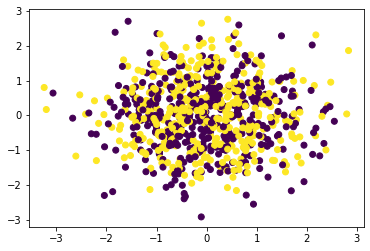

In [31]:
X, y = datasets.make_classification(
n_samples=1000, n_features=10, n_classes=2, random_state=123
)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=123
)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [45]:
class NB():
    
    def __init__(seelf):
        pass
    
    def fit(self,x,y):
        '''
        p(y=c|x) = argmax_c --> p(x1|y=c)*p(x2|y=c)*p(xn|y=c)*p(y=c) 
        
        '''
        self.num_classes = len(set(y))
        # to get class conditional probabilities ########################
        self.means = np.zeros(( len(set(y)) , np.shape(x)[1]    )) #num_classes, num_features
        self.var = np.zeros(( len(set(y)) , np.shape(x)[1]    )) #num_classes, num_features
        #################################################################
        self.priors = np.zeros(( len(set(y)) ))
        
        for i,c in enumerate(set(y)):
            
            x_c = x[np.where(y==c)[0],:] # where x equals class c
            self.means[i,:] = np.mean(x_c,axis=0)
            self.var[i,:] = np.var(x_c,axis=0)
            self.priors = len(np.where(y==c)[0])/len(y)
        
    
    def predict(self,x):
        '''
        for each input x, chose class which maxmizes log sum of conditionals * priors
        '''
        out = []
        for i in range(len(x)):
            #take each point
            class_assign = []
            for c in range(self.num_classes):
            #for that point i, we will pick the class c which minimizes the sum of conditionals j
                value = np.sum(np.log([self.gaussian(x[i,j],self.means[c,j],self.var[c,j]) \
                                       for j in range(np.shape(x)[1])]))
                
                class_assign.append(value)

            out.append(np.argmax(class_assign))
    
        return out
    
    def gaussian(self,x,mean,var):
        
        term1 = (1/np.sqrt(2*np.pi*var))
        term2 = np.exp(-((x-mean)**2)/(2*var))
        
        return term1 * term2
      
            

In [47]:
test = NB()
test.fit(X_train,y_train)
farris = test.predict(X_test)

In [48]:
gnb = GaussianNB()
sklearn = gnb.fit(X_train, y_train).predict(X_test)
sklearn

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0])

In [50]:
sum(farris == sklearn)/len(farris)

1.0